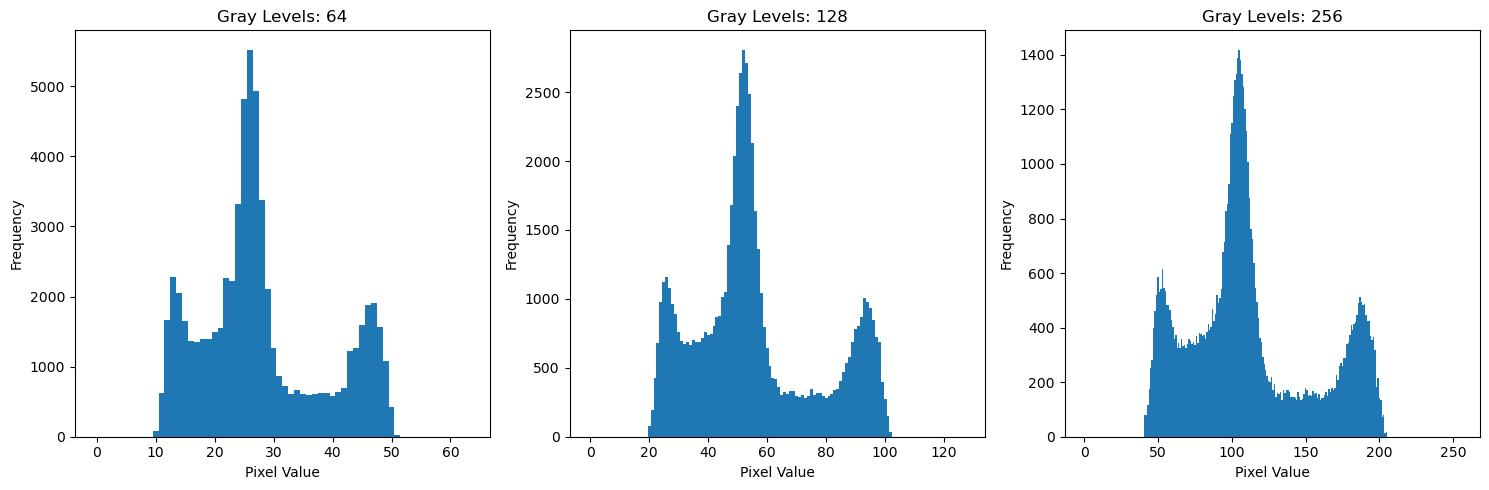

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 加载图像
image = Image.open('rice.png').convert('L')  # 转换为灰度图像
pixels = np.array(image)

# 定义灰度级数
gray_levels = [64, 128, 256]

# 创建直方图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, levels in enumerate(gray_levels):
    # 使用最近邻法将像素值量化到指定灰度级
    pixels_quantized = np.digitize(pixels, bins=np.linspace(0, 255, levels))
    # 计算直方图
    hist, bins = np.histogram(pixels_quantized, bins=levels, range=(0, levels))
    axs[i].bar(bins[:-1], hist, width=bins[1]-bins[0], align='center')
    axs[i].set_title(f'Gray Levels: {levels}')
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


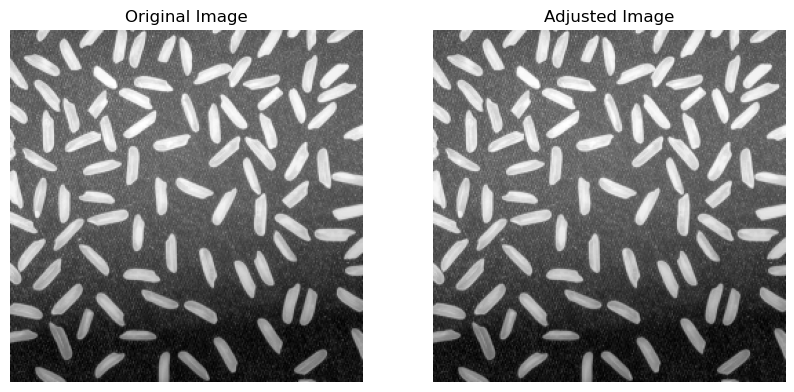

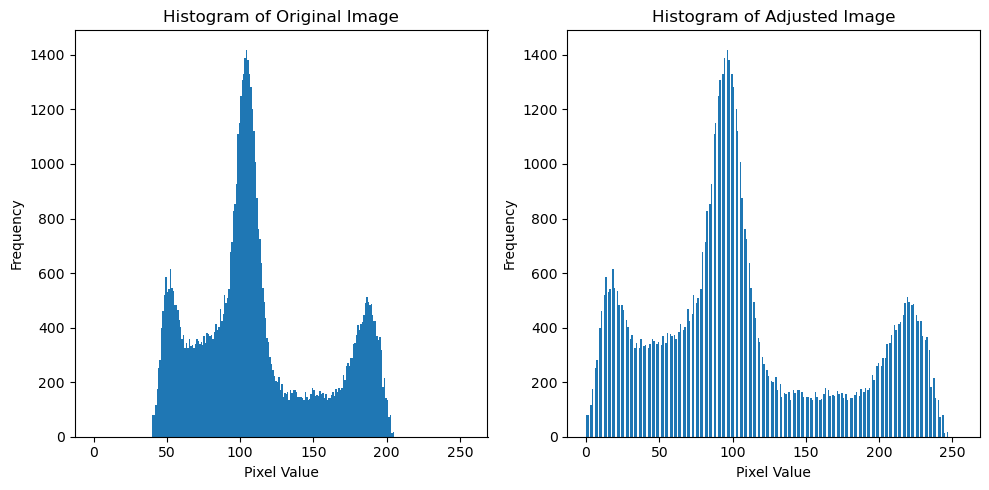

In [8]:
from skimage import data, exposure, io
import matplotlib.pyplot as plt
import numpy as np

# 加载示例图像（由于用户没有上传图像，我们将使用skimage内置的示例图像）
image = io.imread('rice.png')

# 调整图像的灰度范围
def imadjust(I, low_in, high_in, low_out, high_out):
    return exposure.rescale_intensity(I, in_range=(low_in, high_in), out_range=(low_out, high_out))

# 设置灰度范围的低端和高端
low_in, high_in = 40, 210
low_out, high_out = 0, 255

# 调整图像灰度范围
adjusted_image = imadjust(image, low_in, high_in, low_out, high_out)

# 绘制原始图像和调整后的图像
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(adjusted_image, cmap='gray')
ax2.set_title('Adjusted Image')
ax2.axis('off')

# 绘制直方图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(image.ravel(), 256, [0, 256])
axs[0].set_title('Histogram of Original Image')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(adjusted_image.ravel(), 256, [0, 256])
axs[1].set_title('Histogram of Adjusted Image')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


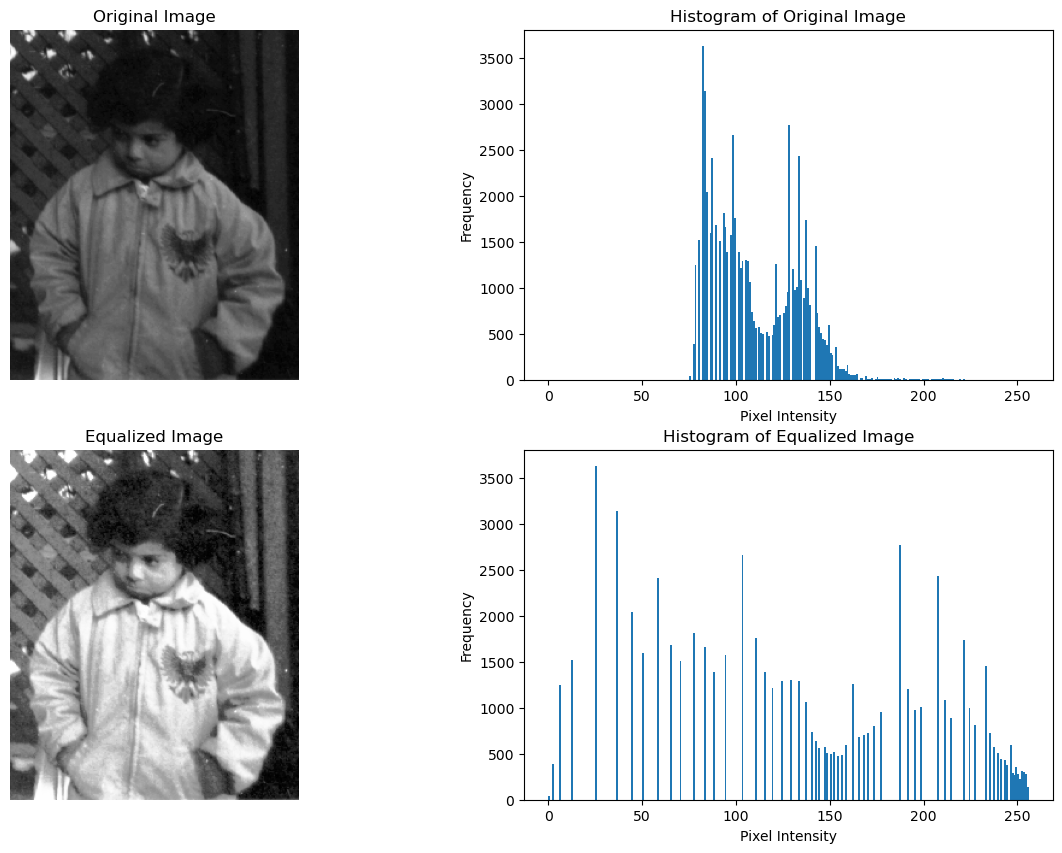

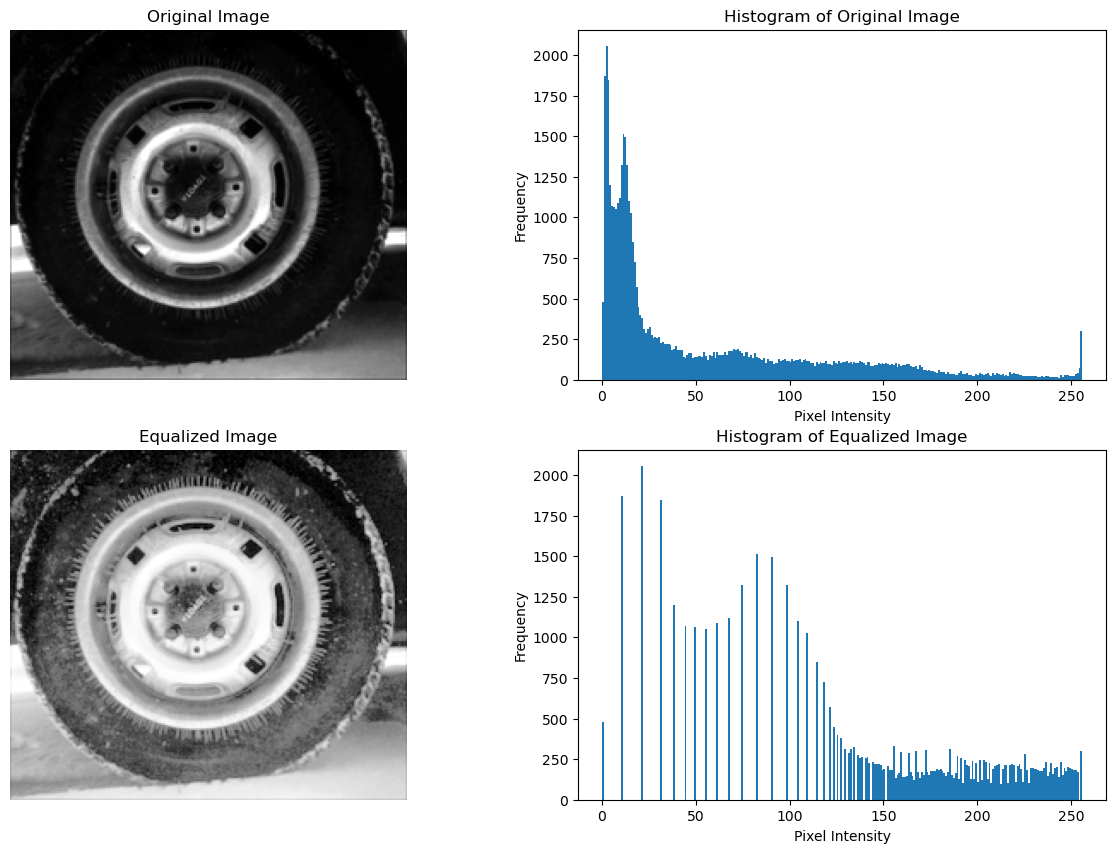

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 绘制直方图
def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# 显示图像
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

# 图像路径
image_paths = ['pout.tif', 'tire.tif']

for image_path in image_paths:
    # 加载图像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 直方图均衡化
    equalized_image = cv2.equalizeHist(image)

    # 绘制原图像和直方图
    plt.figure(figsize=[15, 10])
    plt.subplot(2, 2, 1)
    display_image(image, 'Original Image')
    plt.subplot(2, 2, 2)
    plot_histogram(image, 'Histogram of Original Image')

    # 绘制处理后的图像和直方图
    plt.subplot(2, 2, 3)
    display_image(equalized_image, 'Equalized Image')
    plt.subplot(2, 2, 4)
    plot_histogram(equalized_image, 'Histogram of Equalized Image')

    # 显示结果
    plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


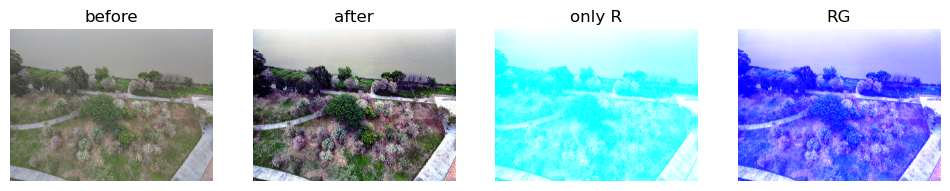

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

# 读取彩色图像
image_path = 'DJI_0049.JPG'
image = Image.open(image_path)
image = np.array(image)

# 分离RGB通道
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

# 对每个通道进行直方图均衡化
R_equalized = equalize_hist(R)
G_equalized = equalize_hist(G)
B_equalized = equalize_hist(B)

# 合并均衡化后的通道
image_equalized = np.dstack([R_equalized, G_equalized, B_equalized])

# 显示原图和均衡化后的图像
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('before')

ax[1].imshow(np.dstack([R_equalized, G_equalized, B_equalized]))
ax[1].axis('off')
ax[1].set_title('after')

ax[2].imshow(np.dstack([R_equalized, G, B]))
ax[2].axis('off')
ax[2].set_title('only R')

ax[3].imshow(np.dstack([R_equalized, G_equalized, B]))
ax[3].axis('off')
ax[3].set_title('RG')

# ax[4].imshow(np.dstack([R, G, B]))
# ax[4].axis('off')
# ax[4].set_title('only B')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


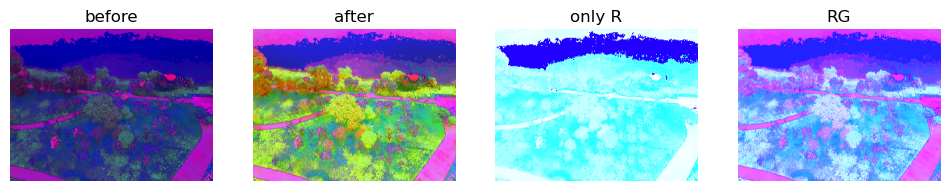

In [24]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

# 读取彩色图像
image_path = 'DJI_0049.JPG'
image = Image.open(image_path)
image = image.convert('HSV')
image = np.array(image)

# 分离RGB通道
H, S, V = image[:, :, 0], image[:, :, 1], image[:, :, 2]

# 对每个通道进行直方图均衡化
H_equalized = equalize_hist(H)
S_equalized = equalize_hist(S)
V_equalized = equalize_hist(V)

# 合并均衡化后的通道
image_equalized = np.dstack([H_equalized, S_equalized, V_equalized])

# 显示原图和均衡化后的图像
fig, ax = plt.subplots(1, 4, figsize=(12, 6))

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('before')

ax[1].imshow(np.dstack([R_equalized, G_equalized, B_equalized]))
ax[1].axis('off')
ax[1].set_title('after')

ax[2].imshow(np.dstack([R_equalized, G, B]))
ax[2].axis('off')
ax[2].set_title('only R')

ax[3].imshow(np.dstack([R_equalized, G_equalized, B]))
ax[3].axis('off')
ax[3].set_title('RG')

# ax[4].imshow(np.dstack([R, G, B]))
# ax[4].axis('off')
# ax[4].set_title('only B')

plt.show()
